In [ ]:
# Usar keras 2.2.5
# conda install -c conda-forge keras=2.2.5

In [1]:
import tensorflow.keras
tensorflow.keras.__version__

'2.7.0'

In [2]:
import numpy as np
np.__version__

'1.19.5'

In [3]:
#elijo el data set.
from keras.datasets import imdb as dataset       # calificaciones peliculas.
#from keras.datasets import reuters as dataset   - comentarios de notcias.
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Cargamos y analizamos el dataset

In [4]:
# Primer hyperparámetro
num_words=30000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 30000


In [6]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


# Impresión de comentario preprocesado con su etiqueta

In [7]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
i = 0
print("Label:", targets[i])
# Las comentarios ya están preprocesados
print(data[i])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

1654784/1641221 [==============================] - 0s 0us/step
['fawn:34701', 'tsukino:52006', 'nunnery:52007', 'sonja:16816', 'vani:63951', 'woods:1408', 'spiders:16115', 'hanging:2345', 'woody:2289', 'trawling:52008', "hold's:52009", 'comically:11307', 'localized:40830', 'disobeying:30568', "'royale:52010", "harpo's:40831", 'canet:52011', 'aileen:19313', 'acurately:52012', "diplomat's:52013", 'rickman:25242', 'arranged:6746', 'rumbustious:52014', 'familiarness:52015', "spider':52016", 'hahahah:68804', "wood':52017", 'transvestism:40833', "hangin':34702", 'bringing:2338', 'seamier:40834', 'wooded:34703', 'bravora:52018', 'grueling:16817', 'wooden:1636', 'wednesday:16818', "'prix:52019", 'altagracia:34704', 'circuitry:52020', 'crotch:11585', 'busybody:57766', "tart'n'tangy:52021", 'burgade:14129', 'thrace:52023', "tom's:11038", 'snuggles:52025', 'francesco:29114', 'complainers:52027', 'templarios:52125', '272:40835', '273:52028', 'zaniacs:52130', '275:34706', 'consenting:27631', 'snugg

In [9]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['34701:fawn', '52006:tsukino', '52007:nunnery', '16816:sonja', '63951:vani', '1408:woods', '16115:spiders', '2345:hanging', '2289:woody', '52008:trawling', "52009:hold's", '11307:comically', '40830:localized', '30568:disobeying', "52010:'royale", "40831:harpo's", '52011:canet', '19313:aileen', '52012:acurately', "52013:diplomat's", '25242:rickman', '6746:arranged', '52014:rumbustious', '52015:familiarness', "52016:spider'", '68804:hahahah', "52017:wood'", '40833:transvestism', "34702:hangin'", '2338:bringing', '40834:seamier', '34703:wooded', '52018:bravora', '16817:grueling', '1636:wooden', '16818:wednesday', "52019:'prix", '34704:altagracia', '52020:circuitry', '11585:crotch', '57766:busybody', "52021:tart'n'tangy", '14129:burgade', '52023:thrace', "11038:tom's", '52025:snuggles', '29114:francesco', '52027:complainers', '52125:templarios', '40835:272', '52028:273', '52130:zaniacs', '34706:275', '27631:consenting', '40836:snuggled', '15492:inanimate', '52030:uality', '11926:bronte', 

In [10]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[1]] )
print(data[1])
print()
print(decoded)

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've

# Padding y formateo de data para entrenar

In [11]:
# Hyperparametro - Longitud máxima de comentario
maxlen=1000

In [12]:
data = pad_sequences(data,maxlen=maxlen)

In [13]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

1000
0.0


In [ ]:
data=np.array(data)

In [14]:
data.shape

(50000, 1000)

# Armar una MLP con one-hot encoding para resolver el problema

In [15]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [16]:
# usar maxlen y num_words para calcular la entrada
# Utilizar una sola capa
model = Sequential()
## TODO
salida_densa = 1
input_shape = num_words*maxlen
#model.add(Dense(salida_densa, input_shape=input_shape, activation=''))
model.add(tensorflow.keras.Input (shape=input_shape))
model.add(Dense(salida_densa,  activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 30000001  
                                                                 
Total params: 30,000,001
Trainable params: 30,000,001
Non-trainable params: 0
_________________________________________________________________


## ¿Por que no es viable esta red?

La red no es viable debido a la gran cantidad de parámetros para entrenar.

# Armar una MLP usando Embeddings

In [18]:
from tensorflow.keras.layers import Embedding, Flatten, Dropout, GlobalAveragePooling1D,Dense
from tensorflow.keras import optimizers,Sequential

In [19]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = 1
dropout=0.2 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=1000, trainable=True))
model.add(GlobalAveragePooling1D())
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 32)          960096    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 960,129
Trainable params: 960,129
Non-trainable params: 0
_________________________________________________________________


In [21]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy'   , optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 12s 8ms/step - loss: 0.6503 - accuracy: 0.6898 - val_loss: 0.5752 - val_accuracy: 0.7923
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4925 - accuracy: 0.8319 - val_loss: 0.4307 - val_accuracy: 0.8522
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3786 - accuracy: 0.8725 - val_loss: 0.3506 - val_accuracy: 0.8829
Epoch 4/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3151 - accuracy: 0.8903 - val_loss: 0.3078 - val_accuracy: 0.8903
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2763 - accuracy: 0.9026 - val_loss: 0.2902 - val_accuracy: 0.8897


# Armar una CNN
Abajo hay un ejemplo de arquitectur

In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding_12 (Embedding)     (None, 1000, 32)          960096    
# _________________________________________________________________
# conv1d_7 (Conv1D)            (None, 1000, 64)          14400     
# _________________________________________________________________
# max_pooling1d_4 (MaxPooling1 (None, 500, 64)           0         
# _________________________________________________________________
# conv1d_8 (Conv1D)            (None, 500, 128)          57472     
# _________________________________________________________________
# global_max_pooling1d_4 (Glob (None, 128)               0         
# _________________________________________________________________
# dropout_4 (Dropout)          (None, 128)               0         
# _________________________________________________________________
# dense_19 (Dense)             (None, 46)                5934      
# =================================================================

In [23]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
nb_words=num_words+3
embed_dim=300
num_filters=32
model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=maxlen, trainable=True))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters*2, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #multi-label (k-hot encoding)



In [24]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 300)         9000900   
                                                                 
 conv1d (Conv1D)             (None, 1000, 32)          67232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           14400     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 64)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
model.fit(data,targets,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 57s 40ms/step - loss: 0.3802 - accuracy: 0.8213 - val_loss: 0.2436 - val_accuracy: 0.9011
Epoch 2/10
1250/1250 [==============================] - 50s 40ms/step - loss: 0.1872 - accuracy: 0.9311 - val_loss: 0.2352 - val_accuracy: 0.9049
Epoch 3/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.1008 - accuracy: 0.9650 - val_loss: 0.2852 - val_accuracy: 0.8968
Epoch 4/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.0562 - accuracy: 0.9804 - val_loss: 0.3194 - val_accuracy: 0.9017
Epoch 5/10
1250/1250 [==============================] - 52s 41ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.3410 - val_accuracy: 0.9011
Epoch 6/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.0286 - accuracy: 0.9901 - val_loss: 0.4095 - val_accuracy: 0.8995
Epoch 7/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.0230 - accuracy: 0.9919 - val_loss: 0.4860 -

# Embeddings

In [26]:
# TODO: Guardar en la variable embeddings los embeddings aprendidos por la red
embeddings = model.layers[0].get_weights()[0]

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
# Inicializar un modelo de NearestNeighbors que devuelva los 10 vecinos más cercanos usando distancia coseno 
nearest = NearestNeighbors(n_neighbors=10, metric='cosine')

In [29]:
# Entrenar un modelo de NearestNeighbors que devuelva los 10 vecinos más cercanos usando distancia coseno 
nearest.fit(embeddings)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [30]:
n_pad = 3
distances, nearest_indexes = nearest.kneighbors(embeddings[index['hello']+n_pad].reshape(1,-1))

In [31]:
nearest_indexes

array([[ 4825,  1958,  5653,  3813, 19881,  2537, 20346, 10977,  9106,
         9824]])

In [32]:
n_pad = 3
# Hacer una función que reciba una palabra e imrpimima las 10 palabras más cercanes:
# Probarla con las siguientes palabras: worst, great, excellent, brilliant, boring

def get_nearest_words(nearest, embeddings, palabra, index, reverse_index, n_pad = 3):
  # Tener en cuenta que para indexar correctamente la palabra en el embeddings debera tener en cuenta el padding inicial
  # También deberá formatearla como un tensor de rango 2
  # embeddings[index[palabra]+n_pad].reshape(1, -1)
  distances, nearest_indexes = nearest.kneighbors(embeddings[index[palabra]+n_pad].reshape(1,-1))
  lista_de_palabras = []
  for idx, d in zip(nearest_indexes[0], distances[0]):
    # Recordar restar el padding al reverse_index: reverse_index[idx-n_pad]
    lista_de_palabras.append(reverse_index[idx-n_pad])
  return lista_de_palabras

In [33]:
get_nearest_words(nearest, embeddings, 'boring', index, reverse_index, n_pad = 3)

['boring',
 'oates',
 'nope',
 'harding',
 'waisted',
 'dull',
 'bulging',
 'intolerable',
 'subpar',
 'kothari']

In [34]:
# Por si quiere guardar los embeddings
# np.save('embeddings', embeddings)

In [35]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [36]:
# Inicializar modelo TSNE - Completar
tsne = TSNE(2, verbose=1)

In [37]:
# Entrenar y transformar
%time embed_2d_tsne = TSNE(n_components=2,learning_rate='auto',init='random').fit_transform(embeddings)

CPU times: user 12min 52s, sys: 8.01 s, total: 13min
Wall time: 7min 22s


In [39]:
embed_2d_tsne.shape

(30003, 2)

# Graficar el TSNE con las siguientes palabras

In [40]:
palabras_malas = ['worst', 'boring', 'forgettable', 'uninteresting', 'awful', 'bad', 'waste', 'unwatchable', 'stinker', 'lousy', 'fails']
palabras_buenas = ['brilliant', 'excellent', 'superb', 'delightful', 'perfect', 'cool', 'nice', 'good', 'extraordinary', 'unforgettable']
palabras_neutras = ['the', 'of', 'it', 'tom', 'is', 'in', 'a', 'movie', 'hey', 'i', 'br', 'pay', 'gentleman', 'one', 
                    'performing', 'dont', 'white']

In [41]:
from matplotlib import pyplot as plt

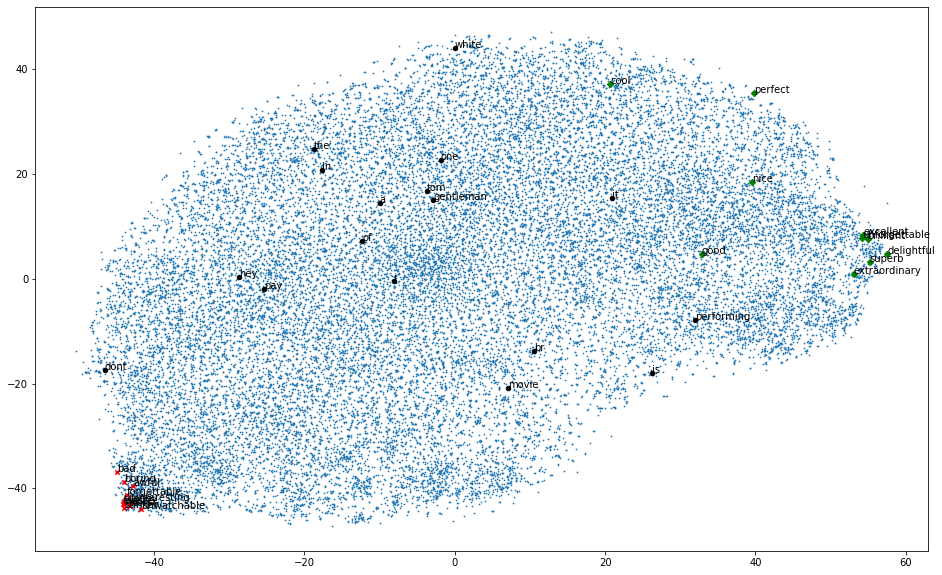

In [42]:
plt.figure(figsize=(16,10))
plt.scatter(embed_2d_tsne[:,0], embed_2d_tsne[:,1], s=0.5)
for palabra in palabras_malas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='r', s=20, marker='x')
  plt.text(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1],reverse_index[index[palabra]])
for palabra in palabras_buenas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='g', s=20, marker='D')
  plt.text(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1],reverse_index[index[palabra]])
for palabra in palabras_neutras:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='k', s=20)
  plt.text(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1],reverse_index[index[palabra]])

plt.show()

# Graficar con TruncatedSVD

In [43]:
TSVD = TruncatedSVD(2)

In [44]:
embed_2d = TSVD.fit_transform(embeddings)

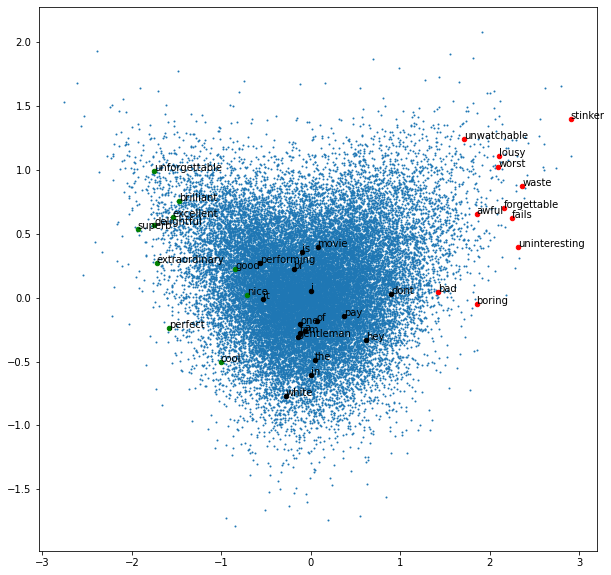

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s=1)
for palabra in palabras_malas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='r', s=20)
  plt.text(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1],reverse_index[index[palabra]])
for palabra in palabras_buenas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='g', s=20)
  plt.text(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1],reverse_index[index[palabra]])
for palabra in palabras_neutras:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='k', s=20)
  plt.text(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1],reverse_index[index[palabra]])
plt.show()